## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# ATTEMPT 1: cutoff points

In [3]:
# Look at APPLICATION_TYPE value counts for binning
count_app_type = application_df['APPLICATION_TYPE'].value_counts()
count_app_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# iloc[8:] = first 8 items
application_types_to_replace = list(count_app_type.iloc[9:].index)
cutoff_value = 156

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Look at CLASSIFICATION value counts for binning
count_class = application_df['CLASSIFICATION'].value_counts()
count_class

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [6]:
# You may find it helpful to look at CLASSIFICATION value counts >1
count_class_no_ones = count_class.loc[count_class > 1]
count_class_no_ones

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(count_class.iloc[7:].index)
cutoff = 287

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other_Class")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000          17326
C2000           6074
C1200           4837
C3000           1918
C2100           1883
Other_Class     1197
C7000            777
C1700            287
Name: CLASSIFICATION, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_values = pd.get_dummies(application_df)
dummy_values.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
# Split our preprocessed data into our features and target arrays
y = dummy_values.IS_SUCCESSFUL.values
X = dummy_values.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [11]:

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5700 - accuracy: 0.7213
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.7292
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7329
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5490 - accuracy: 0.7336
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5476 - accuracy: 0.7328
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7328
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5464 - accuracy: 0.7353
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7367
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7353
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5452 - accuracy: 0.7362

<Axes: >

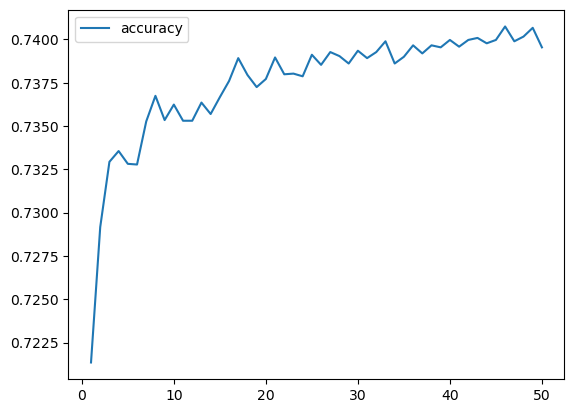

In [12]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [13]:
# Export our model to HDF5 file
file_path = r"C:\Users\lanel\OneDrive\Desktop\Data Analytics info\University of Oregon\UO-Data-Analysis-Bootcamp-Public\Module 21\Challange Files\deep-learning-challenge\AlphabetSoupCharity_Optimization.h5"
nn.save(file_path, save_format='h5')

# ATTEMPT 2: hidden layer count

In [14]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# iloc[8:] = first 8 items
application_types_to_replace = list(count_app_type.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
count_class = application_df['CLASSIFICATION'].value_counts()
count_class

C1000          17326
C2000           6074
C1200           4837
C3000           1918
C2100           1883
Other_Class     1197
C7000            777
C1700            287
Name: CLASSIFICATION, dtype: int64

In [16]:
# You may find it helpful to look at CLASSIFICATION value counts >1
count_class_no_ones = count_class.loc[count_class > 1]
count_class_no_ones

C1000          17326
C2000           6074
C1200           4837
C3000           1918
C2100           1883
Other_Class     1197
C7000            777
C1700            287
Name: CLASSIFICATION, dtype: int64

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(count_class.iloc[5:].index)
cutoff = 1883

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other_Class")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000          17326
C2000           6074
C1200           4837
Other_Class     2261
C3000           1918
C2100           1883
Name: CLASSIFICATION, dtype: int64

In [18]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_values = pd.get_dummies(application_df)
dummy_values.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
# Split our preprocessed data into our features and target arrays
y = dummy_values.IS_SUCCESSFUL.values
X = dummy_values.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [21]:

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5871 - accuracy: 0.7154
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5579 - accuracy: 0.7282
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7317
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accuracy: 0.7317
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7327
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7336
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.7348
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7339
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7345
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7349

<Axes: >

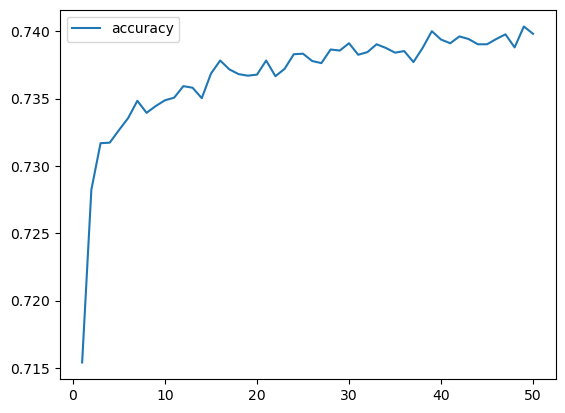

In [22]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [23]:
# Export our model to HDF5 file
file_path = r"C:\Users\lanel\OneDrive\Desktop\Data Analytics info\University of Oregon\UO-Data-Analysis-Bootcamp-Public\Module 21\Challange Files\deep-learning-challenge\AlphabetSoupCharity_Optimization2.h5"
nn.save(file_path, save_format='h5')

# ATTEMPT 3: number of neurons

In [24]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# iloc[8:] = first 8 items
application_types_to_replace = list(count_app_type.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [25]:
# Look at CLASSIFICATION value counts for binning
count_class = application_df['CLASSIFICATION'].value_counts()
count_class

C1000          17326
C2000           6074
C1200           4837
Other_Class     2261
C3000           1918
C2100           1883
Name: CLASSIFICATION, dtype: int64

In [26]:
# You may find it helpful to look at CLASSIFICATION value counts >1
count_class_no_ones = count_class.loc[count_class > 1]
count_class_no_ones

C1000          17326
C2000           6074
C1200           4837
Other_Class     2261
C3000           1918
C2100           1883
Name: CLASSIFICATION, dtype: int64

In [27]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(count_class.iloc[6:].index)
cutoff = 1883

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other_Class")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000          17326
C2000           6074
C1200           4837
Other_Class     2261
C3000           1918
C2100           1883
Name: CLASSIFICATION, dtype: int64

In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_values = pd.get_dummies(application_df)
dummy_values.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [29]:
# Split our preprocessed data into our features and target arrays
y = dummy_values.IS_SUCCESSFUL.values
X = dummy_values.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5681 - accuracy: 0.7249
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5543 - accuracy: 0.7301
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7325
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7328
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5490 - accuracy: 0.7349
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7344
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7352
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5465 - accuracy: 0.7354
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.7352
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5456 - accuracy: 0.7349

<Axes: >

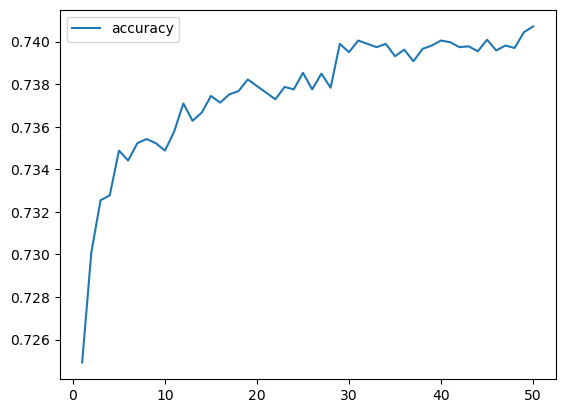

In [32]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [33]:
# Export our model to HDF5 file
file_path = r"C:\Users\lanel\OneDrive\Desktop\Data Analytics info\University of Oregon\UO-Data-Analysis-Bootcamp-Public\Module 21\Challange Files\deep-learning-challenge\AlphabetSoupCharity_Optimization3.h5"
nn.save(file_path, save_format='h5')